In [159]:
# Data Analysis      
import pandas as pd          # data analysis library for handling structured data  
# import modin.pandas as pd       # Speed up your Pandas workflows 
from pandas import DataFrame            
import numpy as np           # mathematical library for working with numerical data 
from pandas.plotting import parallel_coordinates  
from statsmodels.tsa.seasonal import seasonal_decompose # library for performing statistical analysis 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from typing import List 
import pickle 
import calendar 
import scipy.stats as stats 
import datetime 
from flask import Flask, render_template, jsonify

# Visualization
import matplotlib.pyplot as plt     # data visualization library for creating graphs and charts
%matplotlib inline
import seaborn as sns        # data visualization library based on matplotlib for creating more attractive visualizations
import plotly.io as pio
import plotly.express as px   # interactive data visualization library
import plotly.graph_objects as go   # library for creating interactive graphs and charts
import matplotlib 
import os


# Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [160]:
os.listdir()

['app.py',
 'data',
 'Dummy Dataset.xlsx',
 'img',
 'main_data.ipynb',
 'requirements.txt',
 'sample_dataset.csv',
 'static',
 'templates',
 '~$Dummy Dataset.xlsx']

In [167]:


# Path to the .sav file
# file_path = 'Dummy Dataset.xlsx'
file_path = 'Sample_Dataset.xlsx'
 

# Load the .sav file into a DataFrame
df = pd.read_excel(file_path)
# df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()


# Define the new column names
# new_column_names = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration__in_seconds_', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q3', 'Q4', 'Q5', 'Q5_6_TEXT', 'Q6', 'Q6_5_TEXT', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15']
important_columns = ['Employee ID',	'Preferred name', 	'Email - Work',	'Worker Corporate Title', 	'Location Address - City', 
                     'Cost Center Name', 	'UBR Level 8',	'Organization Manager',	'Organization Manager Employee ID',	
                     'Organization Manager Email',	'Matrix Manager']

filtered_df = df[important_columns]

# Step 1: Remove non-numeric characters from 'Employee ID' and keep only numbers
filtered_df['Employee ID'] = filtered_df['Employee ID'].astype(str).str.replace(r'\D', '', regex=True)
filtered_df['Organization Manager Employee ID'] = filtered_df['Organization Manager Employee ID'].astype(str).str.replace(r'\D', '', regex=True)

# Remove leading and trailing whitespaces from each column in filtered_df where the column is of type 'object'
for col in filtered_df.select_dtypes(include=['object']).columns:
    filtered_df[col] = filtered_df[col].str.strip()


print(filtered_df.shape)

filtered_df.head()

(50, 11)


,Employee ID,Preferred name,Email - Work,Worker Corporate Title,Location Address - City,Cost Center Name,UBR Level 8,Organization Manager,Organization Manager Employee ID,Organization Manager Email,Matrix Manager
0,1000,Alice Johnson,alice.johnson@company.com,Analyst,New York,Finance,H_1844 CFO Group Finance,Alice Johnson,1000,alice.johnson@company.com,Charlie Moore
1,1001,Bob Smith,bob.smith@company.com,Associate,San Francisco,IT,H_8605 Group Tax,Alice Johnson,1000,alice.johnson@company.com,Samantha Adams
2,1002,Carol Williams,carol.williams@company.com,Assistant Vice President,Chicago,Marketing,H_8709 Treasury,Bob Smith,1001,bob.smith@company.com,Ben Miller
3,1003,David Brown,david.brown@company.com,Vice President,Houston,Operations,H_4322 CFO Group Finance,Bob Smith,1001,bob.smith@company.com,Nicole Thomas
4,1004,Eve Davis,eve.davis@company.com,Director,Austin,Sales,A_20234 CFO Regional Finance,Carol Williams,1002,carol.williams@company.com,Ethan Clarke


In [168]:
# # Remove non-numeric characters from each column in the filtered_df
# for col in filtered_df.columns:
#     filtered_df[col] = filtered_df[col].astype(str).str.replace(r'\D', '', regex=True)


# Step 1: Get unique values from "UBR Level 8"
unique_ubr_levels = filtered_df['UBR Level 8'].unique()

# Step 2: Create separate datasets for each unique "UBR Level 8"
ubr_level_datasets = {
    ubr_level.strip(): filtered_df[filtered_df['UBR Level 8'].str.strip() == ubr_level.strip()].copy()
    for ubr_level in unique_ubr_levels
}


filtered_df

,Employee ID,Preferred name,Email - Work,Worker Corporate Title,Location Address - City,Cost Center Name,UBR Level 8,Organization Manager,Organization Manager Employee ID,Organization Manager Email,Matrix Manager
0,1000,Alice Johnson,alice.johnson@company.com,Analyst,New York,Finance,H_1844 CFO Group Finance,Alice Johnson,1000,alice.johnson@company.com,Charlie Moore
1,1001,Bob Smith,bob.smith@company.com,Associate,San Francisco,IT,H_8605 Group Tax,Alice Johnson,1000,alice.johnson@company.com,Samantha Adams
2,1002,Carol Williams,carol.williams@company.com,Assistant Vice President,Chicago,Marketing,H_8709 Treasury,Bob Smith,1001,bob.smith@company.com,Ben Miller
3,1003,David Brown,david.brown@company.com,Vice President,Houston,Operations,H_4322 CFO Group Finance,Bob Smith,1001,bob.smith@company.com,Nicole Thomas
4,1004,Eve Davis,eve.davis@company.com,Director,Austin,Sales,A_20234 CFO Regional Finance,Carol Williams,1002,carol.williams@company.com,Ethan Clarke
...,...,...,...,...,...,...,...,...,...,...,...
45,1045,Tara Bell,tara.bell@company.com,Managing Director,Madison,Client Relations,H_4322 CFO Group Finance,Ruth Simmons,1043,ruth.simmons@company.com,Sophia Bailey
46,1046,Ulysses Rivera,ulysses.rivera@company.com,Analyst,Chattanooga,Investor Relations,A_20234 CFO Regional Finance,Sam Butler,1044,sam.butler@company.com,Elijah Fisher
47,1047,Vera Ward,vera.ward@company.com,Associate,Des Moines,Manufacturing,B_8548 US CFO,Tara Bell,1045,tara.bell@company.com,Vanessa Lee
48,1048,Walter Brooks,walter.brooks@company.com,Vice President,Lexington,Logistics,H_1844 CFO Group Finance,Ulysses Rivera,1046,ulysses.rivera@company.com,Jordan Baker


In [169]:
unique_ubr_levels.tolist()

['H_1844 CFO Group Finance',
 'H_8605 Group Tax',
 'H_8709 Treasury',
 'H_4322 CFO Group Finance',
 'A_20234 CFO Regional Finance',
 'B_8548 US CFO']

In [158]:
# Step 1: Get unique values from "UBR Level 8"
unique_ubr_levels = filtered_df['UBR Level 8'].unique()

# Step 2: Create separate datasets for each unique "UBR Level 8"
ubr_level_datasets = {ubr_level: filtered_df[filtered_df['UBR Level 8'] == ubr_level] for ubr_level in unique_ubr_levels}

ubr_level_datasets['A_20234 CFO Regional Finance']

,Employee ID,Preferred name,Email - Work,Worker Corporate Title,Location Address - City,Cost Center Name,UBR Level 8,Organization Manager,Organization Manager Employee ID,Organization Manager Email,Matrix Manager
15,8848658,Maria Harte,NaN,Assistant Vice President,NaN,NaN,A_20234 CFO Regional Finance,Carol Edwards (6304223),6304223,NaN,NaN
16,6394345,John Juice,NaN,Assistant Vice President,NaN,NaN,A_20234 CFO Regional Finance,Ginnie Dave (4334532),4334532,NaN,NaN
17,4554532,Joshua John,NaN,Vice President,NaN,NaN,A_20234 CFO Regional Finance,Tom Tobby (2034485),2034485,NaN,NaN
18,8783423,Bradley Beal,NaN,Vice President,NaN,NaN,A_20234 CFO Regional Finance,(Bruce Lee (8494532),8494532,NaN,NaN
19,8783424,Kevin Durant,NaN,Assistant Vice President,NaN,NaN,A_20234 CFO Regional Finance,Bob Dylan (9003142),9003142,NaN,NaN
20,8958931,Cyan Jones,NaN,Associate,NaN,NaN,A_20234 CFO Regional Finance,Anthony Creece 8495847,8495847,NaN,NaN
21,8112348,Oprah Winfrey,NaN,Analyst,NaN,NaN,A_20234 CFO Regional Finance,James Gilmore 4348234,4348234,NaN,NaN


In [144]:
ubr_level_datasets['A_20234 CFO Regional Finance'].columns

Index(['Employee ID', 'Preferred name', 'Email - Work', 'Worker Corporate Title', 'Location Address - City', 'Cost Center Name', 'UBR Level 8', 'Organization Manager', 'Organization Manager Employee ID', 'Organization Manager Email', 'Matrix Manager'], dtype='object')

In [170]:
# Define the hierarchy levels based on the corporate titles
title_hierarchy = {
    "Managing Director": 1,
    "Director": 2,
    "Vice President": 3,
    "Assistant Vice President": 4,
    "Associate": 5,
    "Analyst": 6
}

ubr_level = [ubr_level for ubr_level in unique_ubr_levels]

def get_chart_data(ubr_level):

    if ubr_level in ubr_level_datasets:
        chart_data = ubr_level_datasets[ubr_level]
        
        selected_columns = [
            "Employee ID", "Preferred name", "Email - Work", 
            "Worker Corporate Title", "Location Address - City", 
            "Organization Manager Employee ID", "Organization Manager"
        ]
        chart_data = chart_data[selected_columns]
        
        # print(chart_data['Worker Corporate Title'])
        # Assign hierarchy rank based on corporate title
        chart_data['Hierarchy Rank'] = chart_data['Worker Corporate Title'].map(title_hierarchy)
        chart_data.fillna({
            'Employee ID': 'Unknown',
            'Preferred name': 'Not Available',
            'Email - Work': 'No Email Provided',
            'Worker Corporate Title': 'No Title',
            'Location Address - City': 'Unknown City',
            'Cost Center Name': 'Not Assigned',
            'Organization Manager': 'No Manager',
            'Organization Manager Employee ID': '0',
            'Organization Manager Email': 'No Email',
            'Matrix Manager': 'No Matrix Manager',
            
        }, inplace=True)
        # Sort by rank to process the hierarchy in the correct order
        chart_data.sort_values(by='Hierarchy Rank', inplace=True)


        # Explicitly structure each record with all columns in the JSON response
        simplified_data = [
            {
                "Employee ID": item["Employee ID"],
                "Preferred name": item["Preferred name"],
                "Email - Work": item["Email - Work"],
                "Worker Corporate Title": item["Worker Corporate Title"],
                "Location Address - City": item["Location Address - City"],
                "Hierarchy Rank": item["Hierarchy Rank"],
                "Cost Center Name": item["Cost Center Name"],
                "Organization Manager": item["Organization Manager"],
                "Organization Manager Employee ID": item["Organization Manager Employee ID"],
                "Organization Manager Email": item["Organization Manager Email"],
                "Matrix Manager": item["Matrix Manager"]
            }
            for item in chart_data.to_dict(orient="records")
        ]
        
        # Return chart data as a dictionary for testing (instead of jsonify)
        return simplified_data 
    else:
        return {"error": "UBR Level not found"}


data = get_chart_data(ubr_level[-3])




def get_chart_data_2(ubr_level):
    # Temporary test data to check if JSON returns correctly
    test_data = [
        {
            "Employee ID": "1",
            "Preferred name": "John Doe",
            "Email - Work": "john@example.com",
            "Worker Corporate Title": "Director",
            "Location Address - City": "New York",
            "Organization Manager Employee ID": "",
            "Organization Manager": ""
        },
        {
            "Employee ID": "2",
            "Preferred name": "Jane Smith",
            "Email - Work": "jane@example.com",
            "Worker Corporate Title": "Vice President",
            "Location Address - City": "San Francisco",
            "Organization Manager Employee ID": "1",
            "Organization Manager": "John Doe"
        },
        {
            "Employee ID": "2",
            "Preferred name": "Jane Smith",
            "Email - Work": "jane@example.com",
            "Worker Corporate Title": "Assistant Vice President",
            "Location Address - City": "San Francisco",
            "Organization Manager Employee ID": "1",
            "Organization Manager": "John Doe"
        },
        {
            "Employee ID": "2",
            "Preferred name": "Jane Smith",
            "Email - Work": "jane@example.com",
            "Worker Corporate Title": "Vice President",
            "Location Address - City": "San Francisco",
            "Organization Manager Employee ID": "1",
            "Organization Manager": "John Doe"
        }
    ]
    return test_data

data_2 = get_chart_data_2(ubr_level[-3])

print(data)
print(data_2)

[{'Employee ID': '1015', 'Preferred name': 'Paul Thompson', 'Email - Work': 'paul.thompson@company.com', 'Worker Corporate Title': 'Managing Director', 'Location Address - City': 'Atlanta', 'Organization Manager Employee ID': '1013', 'Organization Manager': 'Nate Harris', 'Hierarchy Rank': 1}, {'Employee ID': '1045', 'Preferred name': 'Tara Bell', 'Email - Work': 'tara.bell@company.com', 'Worker Corporate Title': 'Managing Director', 'Location Address - City': 'Madison', 'Organization Manager Employee ID': '1043', 'Organization Manager': 'Ruth Simmons', 'Hierarchy Rank': 1}, {'Employee ID': '1009', 'Preferred name': 'Jack Moore', 'Email - Work': 'jack.moore@company.com', 'Worker Corporate Title': 'Director', 'Location Address - City': 'Denver', 'Organization Manager Employee ID': '1007', 'Organization Manager': 'Henry Anderson', 'Hierarchy Rank': 2}, {'Employee ID': '1003', 'Preferred name': 'David Brown', 'Email - Work': 'david.brown@company.com', 'Worker Corporate Title': 'Vice Presi

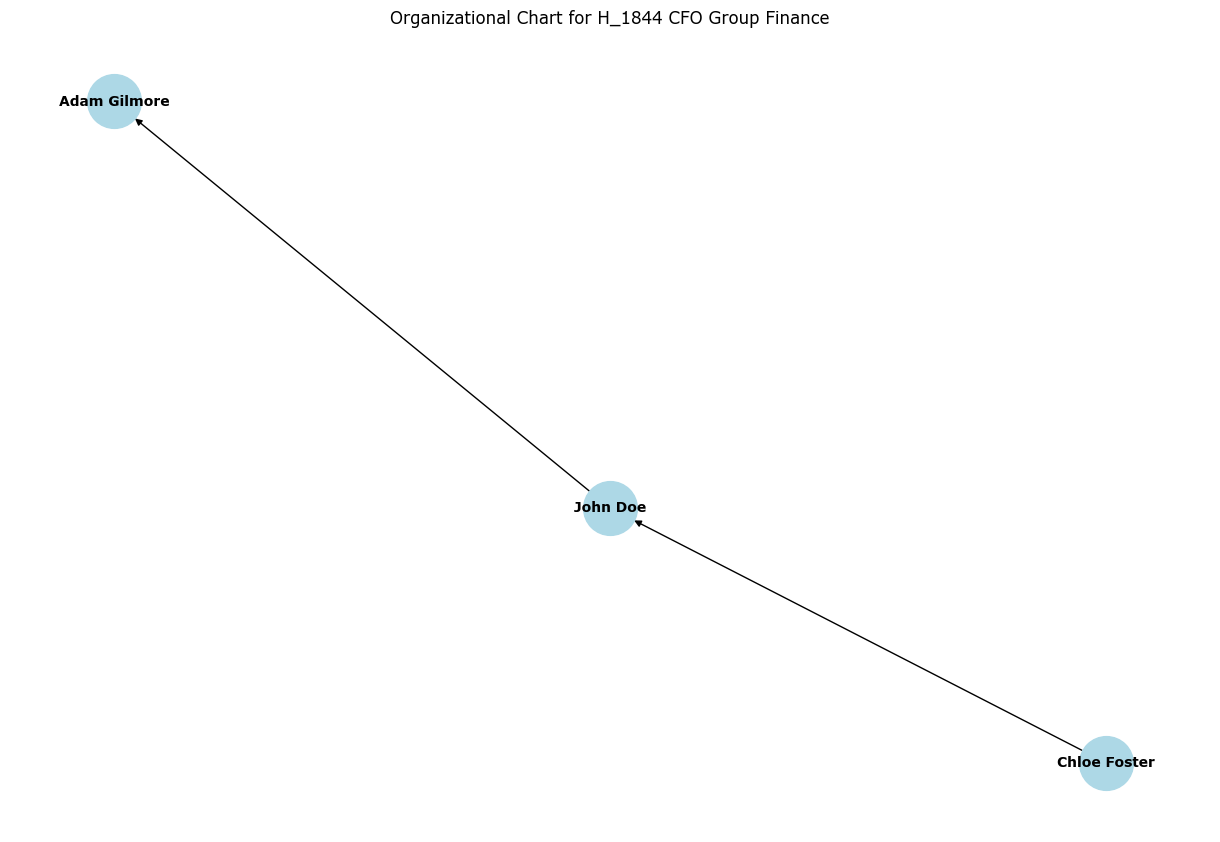

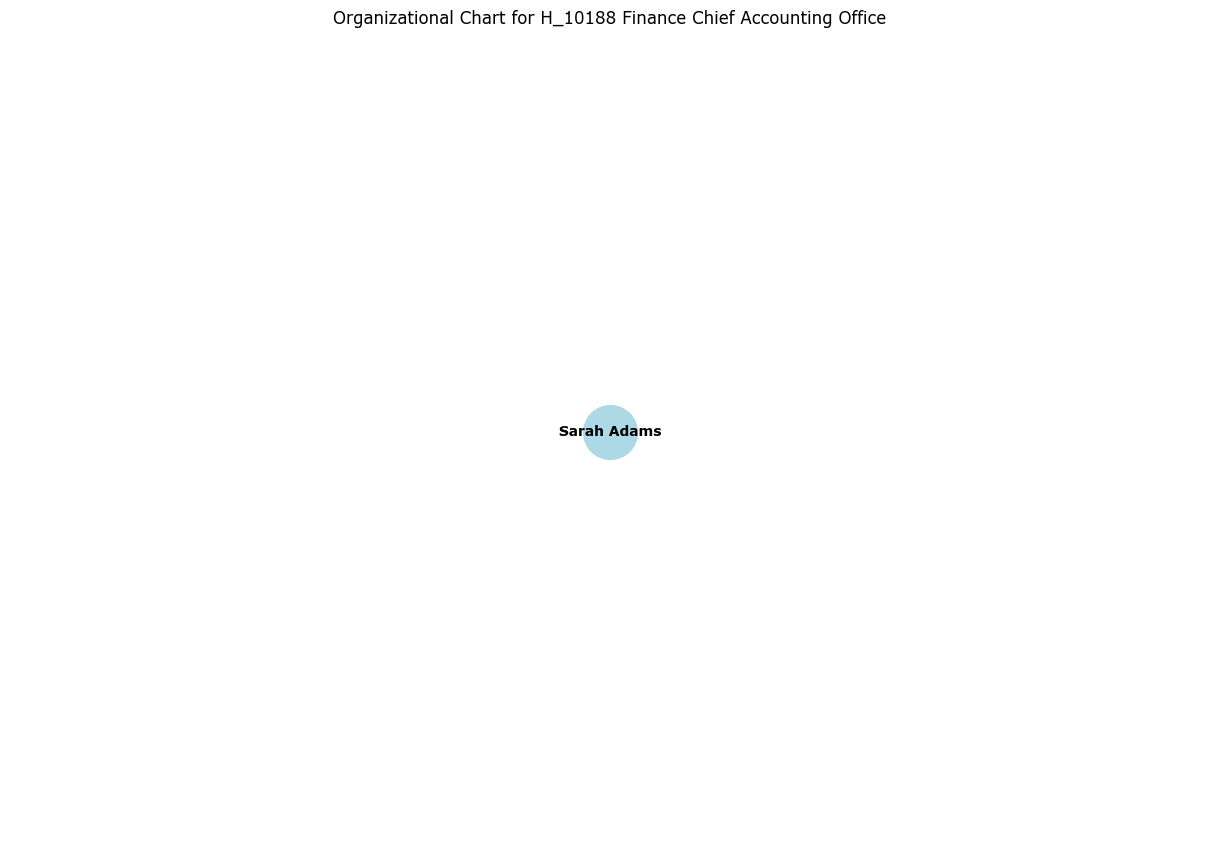

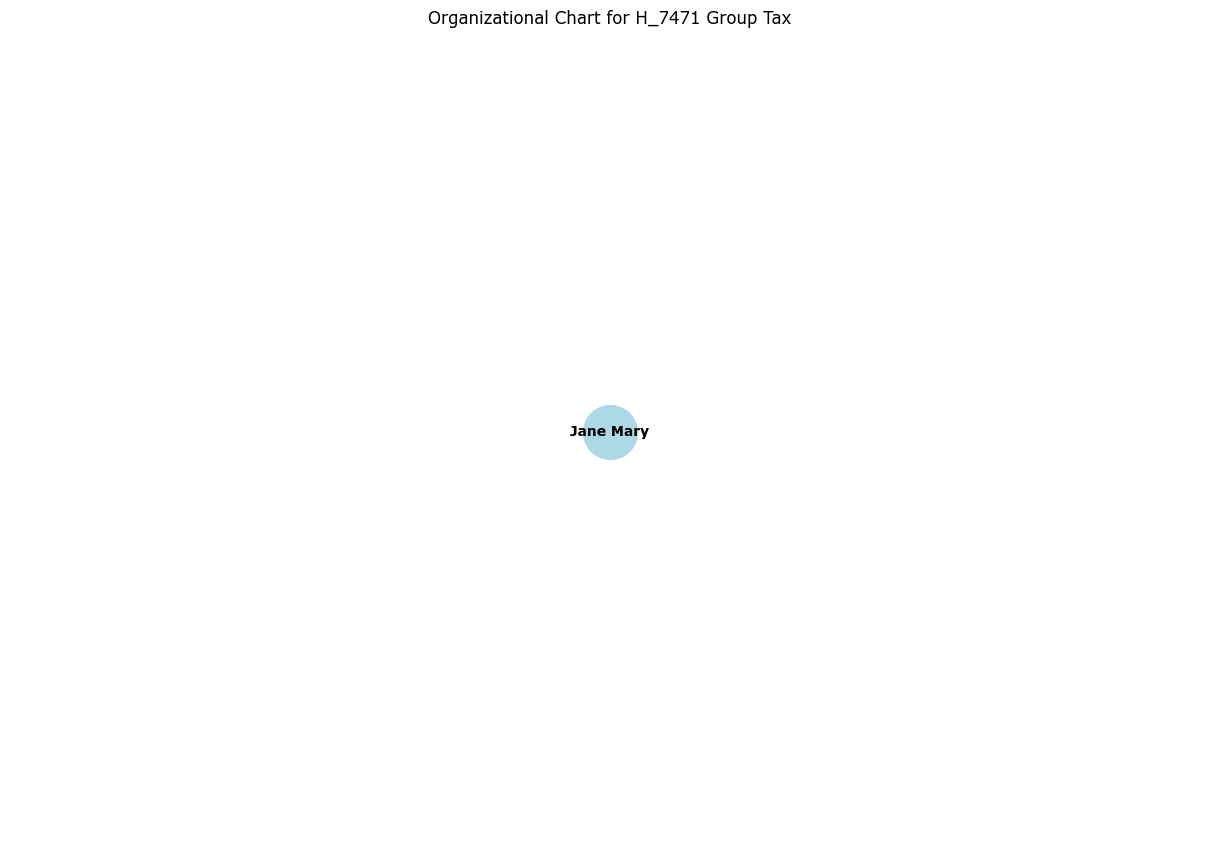

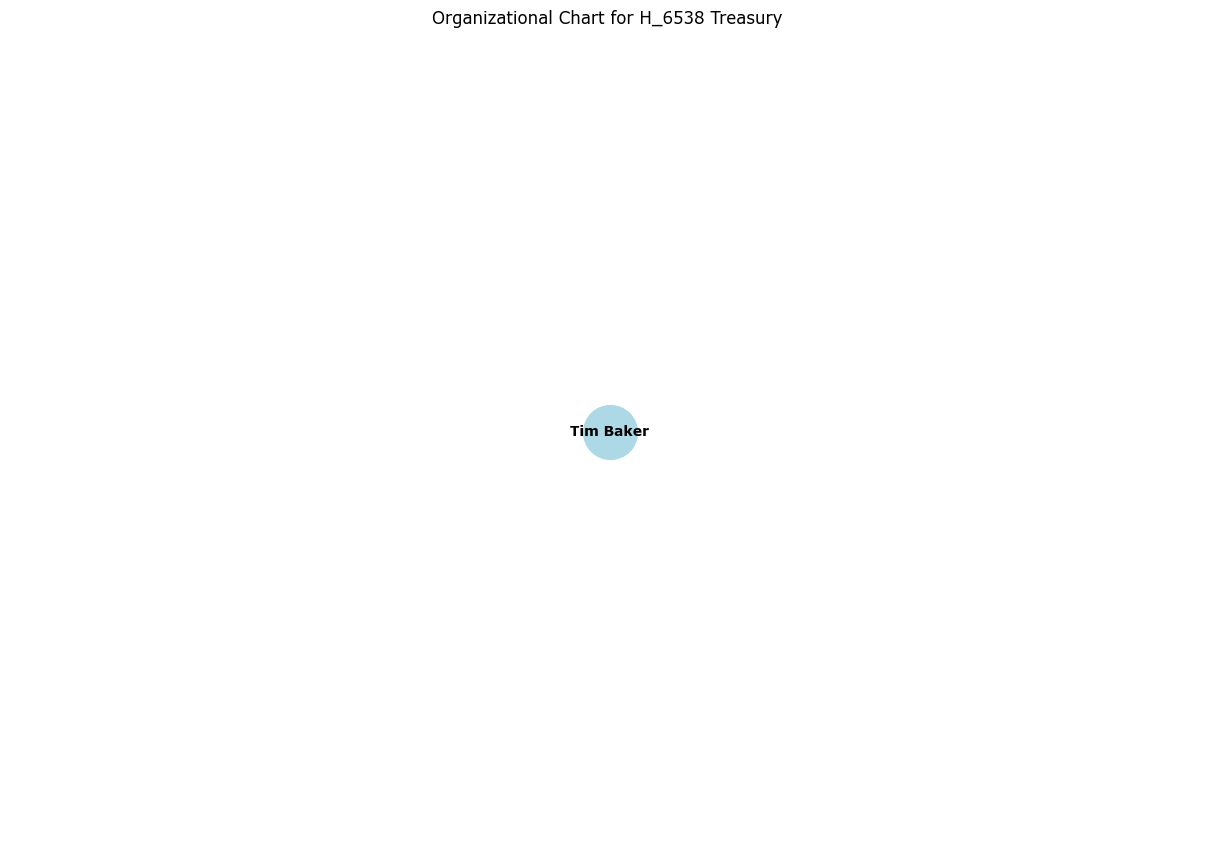

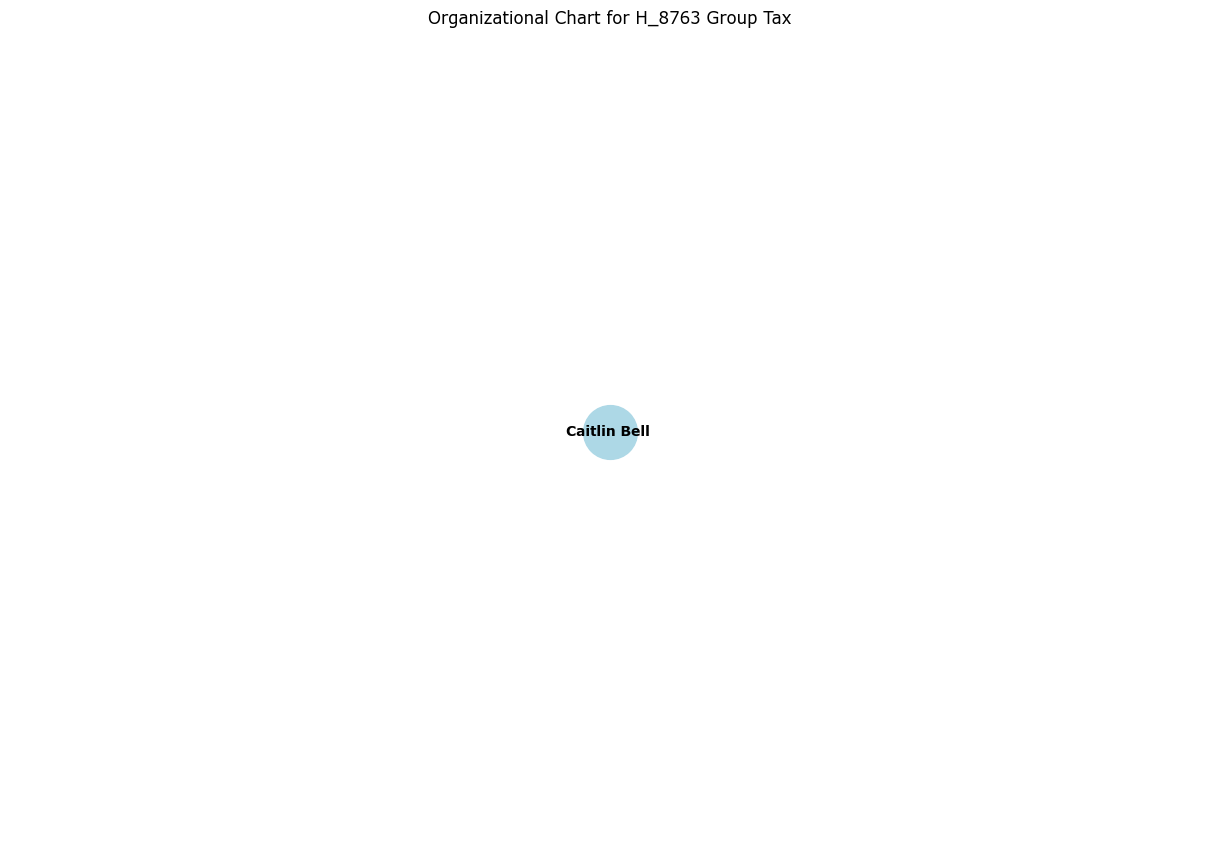

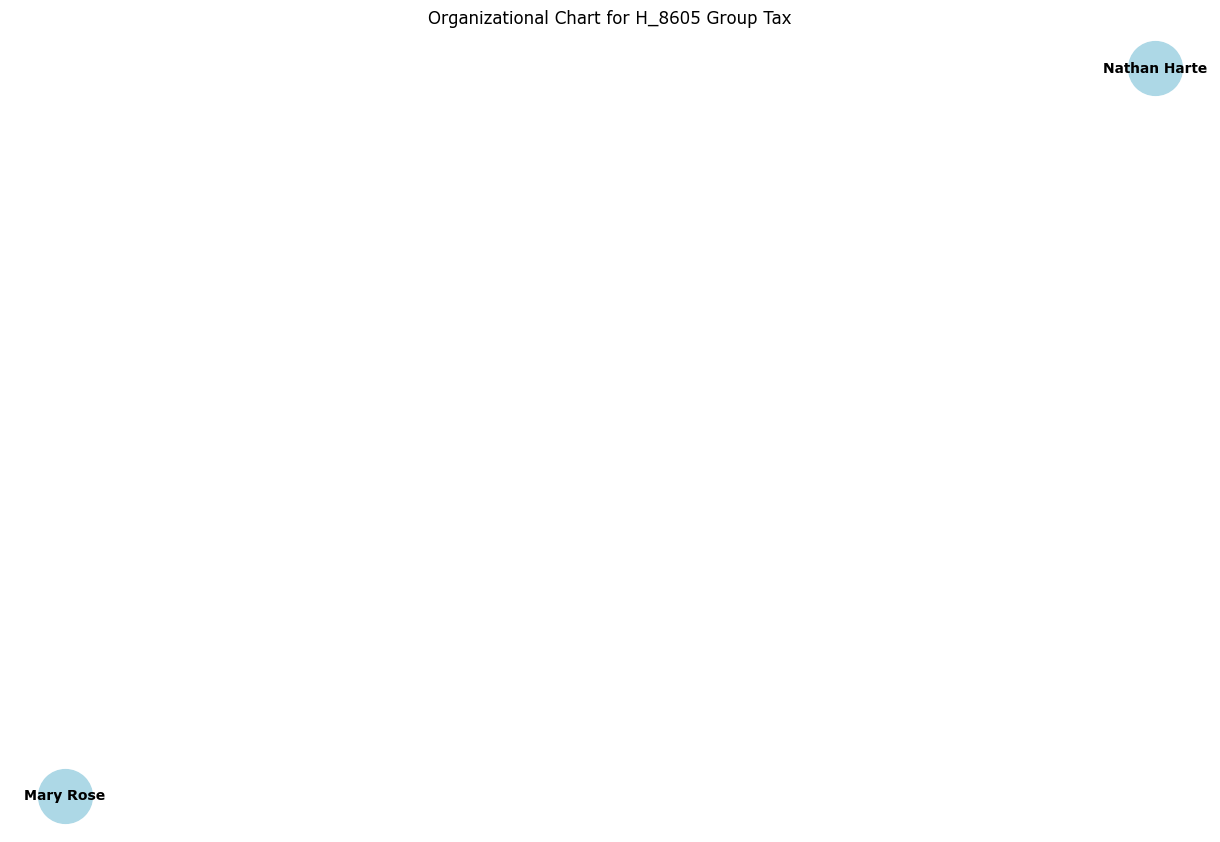

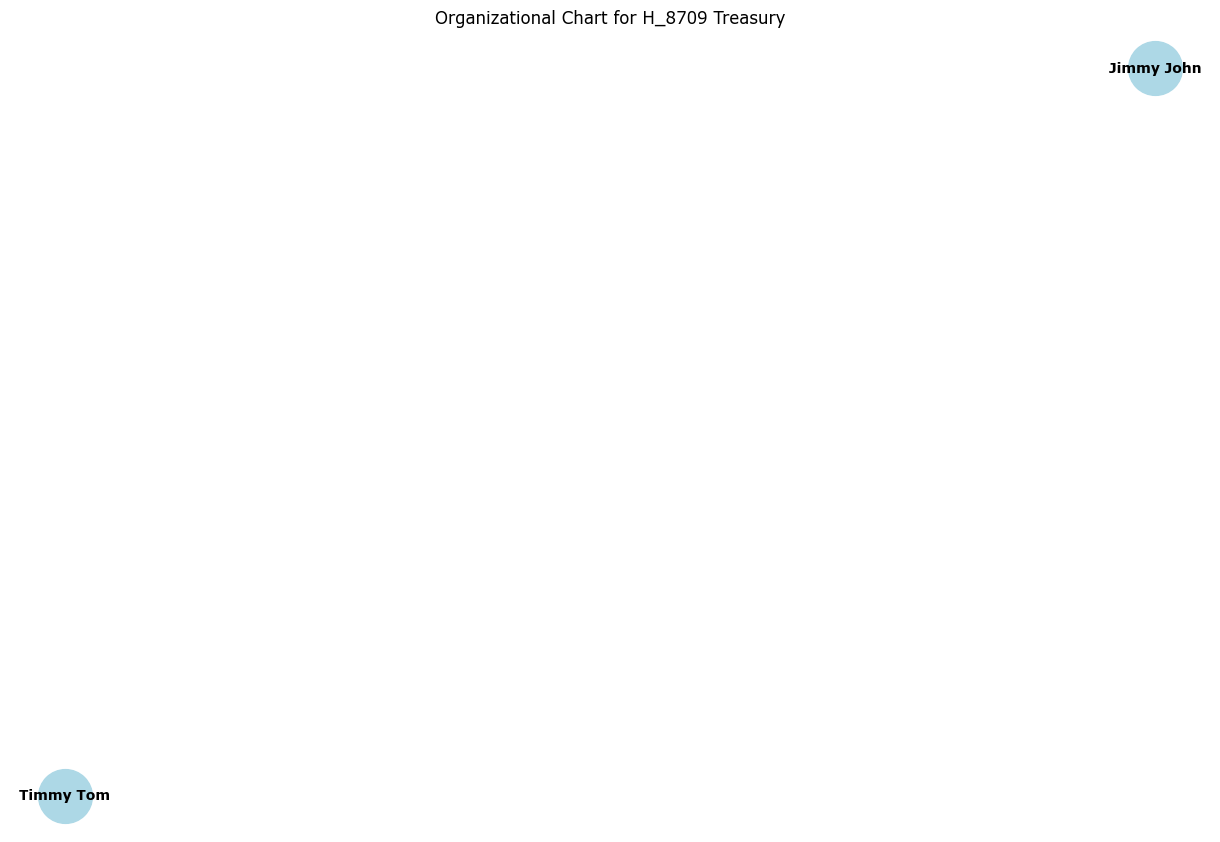

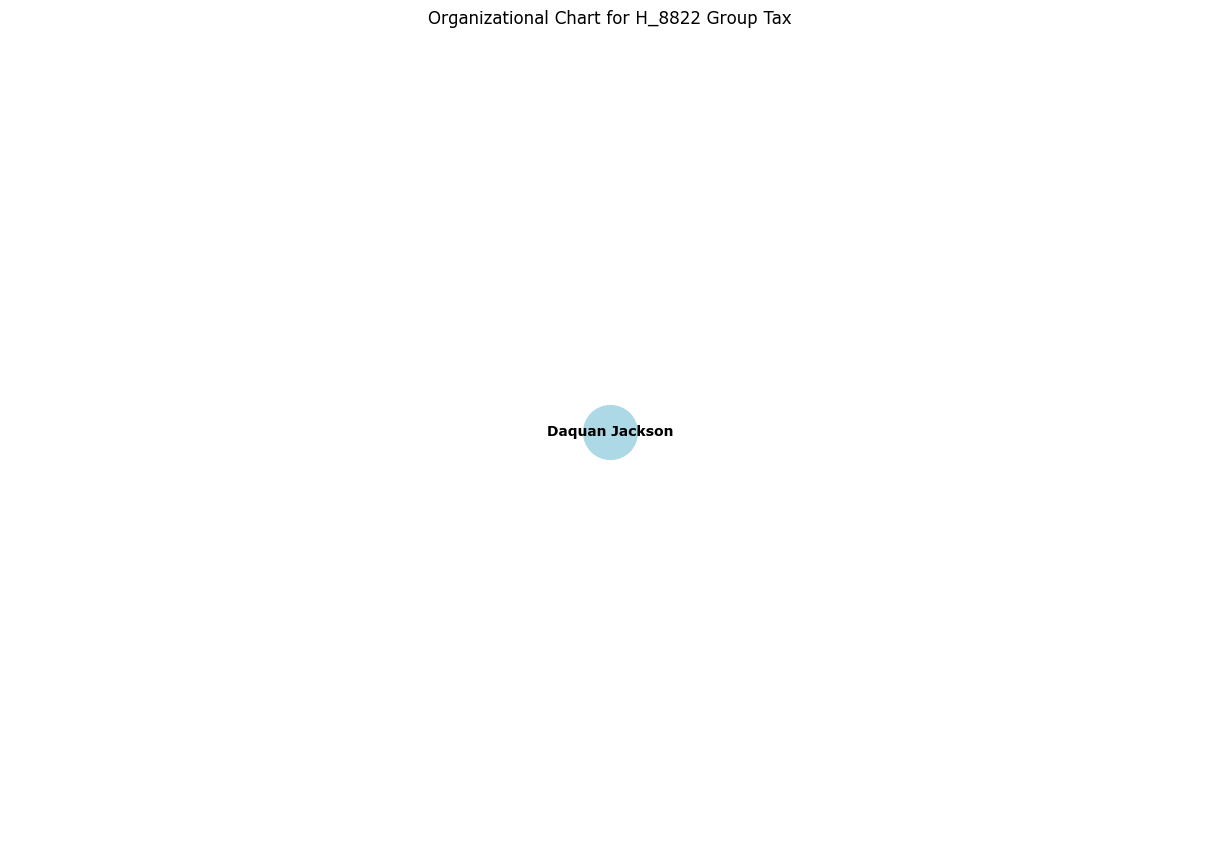

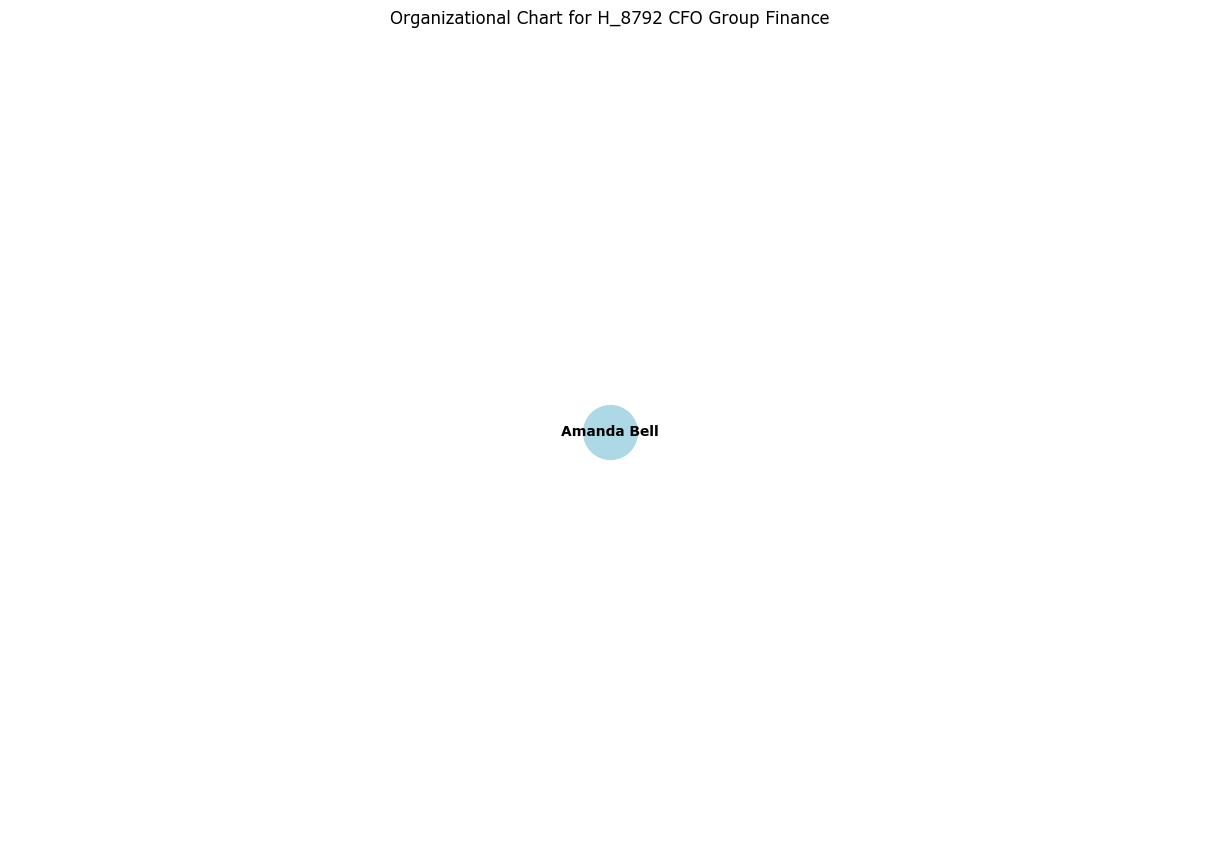

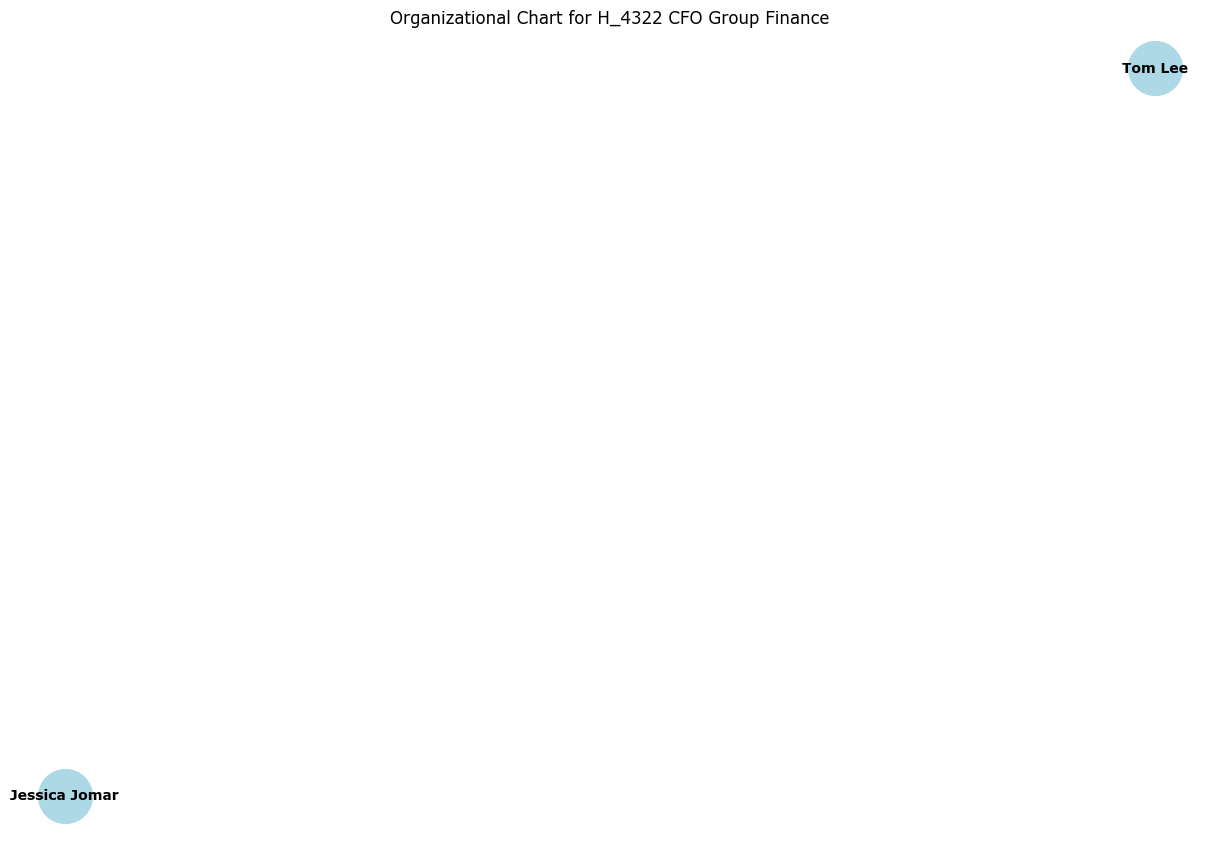

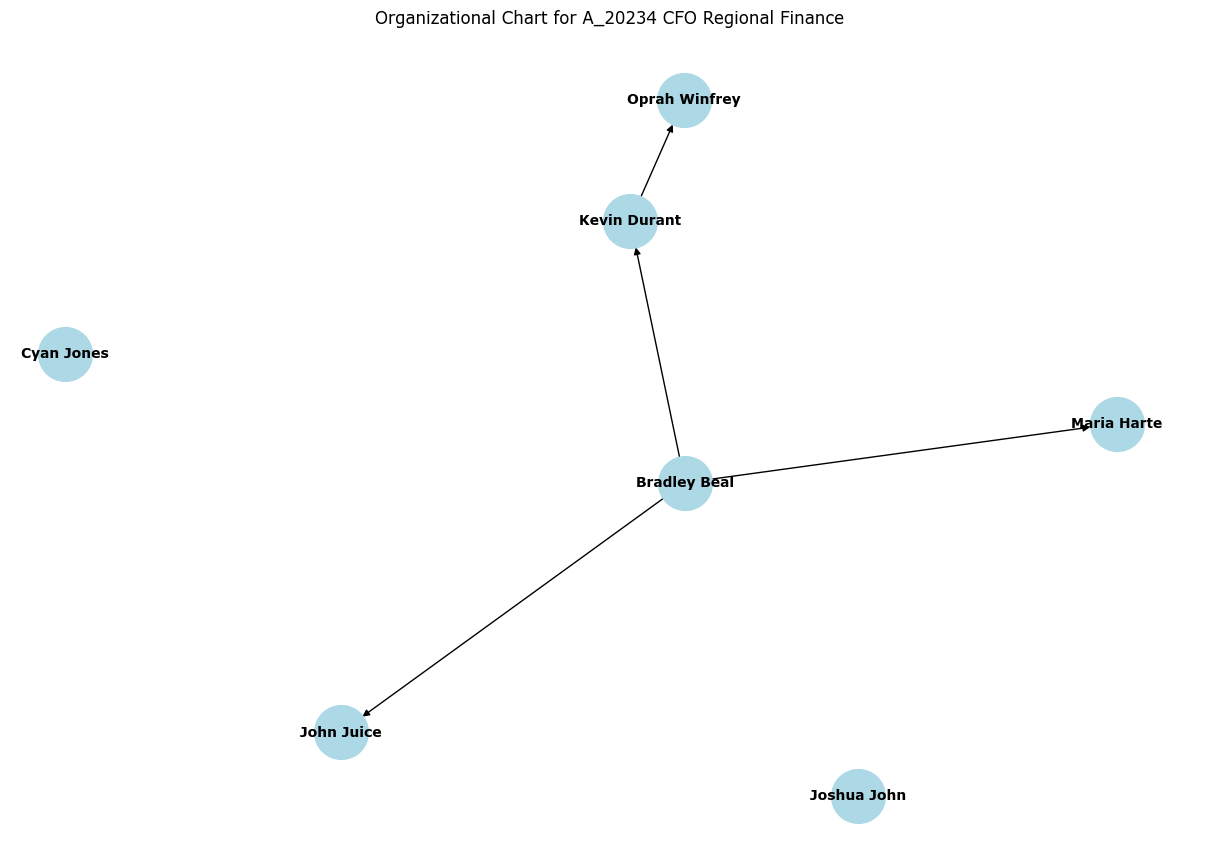

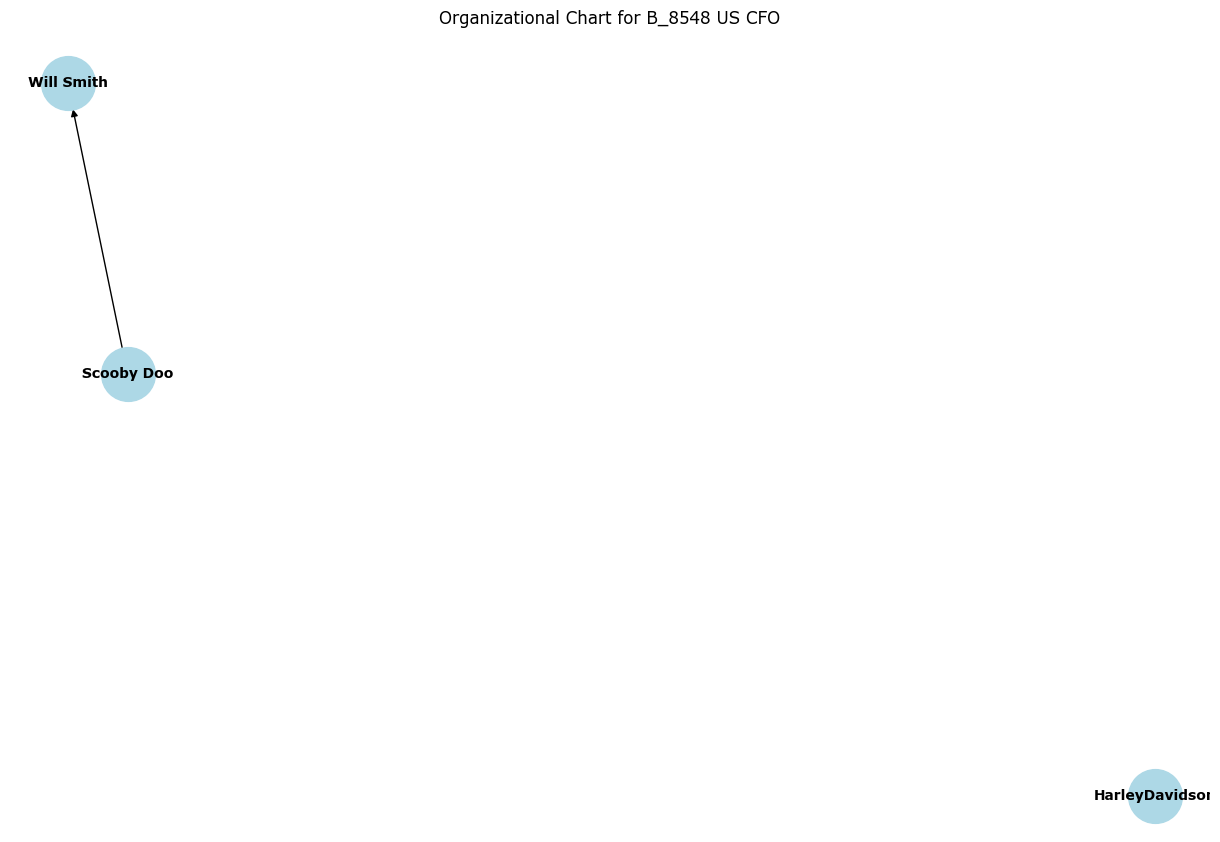

In [45]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define the hierarchy levels based on the corporate titles
title_hierarchy = {
    "Managing Director": 1,
    "Director": 2,
    "Vice President": 3,
    "Assistant Vice President": 4,
    "Associate": 5,
    "Analyst": 6
}

# Function to create and visualize the organizational chart for each unique UBR Level 8
def create_org_chart(dataset, title_hierarchy):
    # Step 1: Assign hierarchy rank based on corporate title
    dataset['Hierarchy Rank'] = dataset['Worker Corporate Title'].map(title_hierarchy)
    
    # Step 2: Sort by rank to process the hierarchy in the correct order
    sorted_dataset = dataset.sort_values(by='Hierarchy Rank').reset_index(drop=True)
    
    # Step 3: Create a graph for visualization
    G = nx.DiGraph()
    
    # Add nodes and establish reporting lines
    for index, row in sorted_dataset.iterrows():
        # Add each employee as a node
        G.add_node(row['Employee ID'], label=row['Preferred name'], title=row['Worker Corporate Title'])
        
        # Find potential managers from previous levels (flexible relationship creation)
        potential_managers = sorted_dataset[
            (sorted_dataset['Hierarchy Rank'] < row['Hierarchy Rank']) &
            (sorted_dataset.index < index)
        ]
        
        if not potential_managers.empty:
            # Assign the manager with the highest rank (lowest hierarchy number) from available managers
            manager_id = potential_managers.iloc[-1]['Employee ID']  # Last manager from potential ones
            G.add_edge(manager_id, row['Employee ID'])
    
    # Visualize the graph
    pos = nx.spring_layout(G)  # Layout for visualization
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), 
            node_size=1500, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
    plt.title(f"Organizational Chart for {dataset['UBR Level 8'].iloc[0]}")
    plt.show()

# Iterate through each unique dataset in 'ubr_level_datasets' to create and visualize the charts
for ubr_level, data in ubr_level_datasets.items():
    create_org_chart(data, title_hierarchy)


In [166]:
import pandas as pd

# Define sample data with realistic names and job details
data = {
    "Employee ID": [f"{1000 + i}" for i in range(50)],
    "Preferred name": [
        "Alice Johnson", "Bob Smith", "Carol Williams", "David Brown", "Eve Davis",
        "Frank Wilson", "Grace Martinez", "Henry Anderson", "Ivy Thomas", "Jack Moore",
        "Kate Taylor", "Leo Jackson", "Mona White", "Nate Harris", "Olivia Martin",
        "Paul Thompson", "Quincy Garcia", "Rachel Clark", "Steve Lewis", "Tina Walker",
        "Uma Robinson", "Victor Young", "Wendy King", "Xander Wright", "Yara Scott",
        "Zane Torres", "Amy Bennett", "Brian Lee", "Chloe Ramirez", "Daniel Perez",
        "Ella Gonzales", "Fred Lopez", "Georgia Carter", "Hank Edwards", "Isabel Evans",
        "John Collins", "Kara Stewart", "Liam Sanchez", "Mia Hughes", "Noah Foster",
        "Omar Richardson", "Penny Murphy", "Quinn Rogers", "Ruth Simmons", "Sam Butler",
        "Tara Bell", "Ulysses Rivera", "Vera Ward", "Walter Brooks", "Xena Phillips"
    ],
    "Email - Work": [
        f"{name.lower().replace(' ', '.')}@company.com" for name in [
            "Alice Johnson", "Bob Smith", "Carol Williams", "David Brown", "Eve Davis",
            "Frank Wilson", "Grace Martinez", "Henry Anderson", "Ivy Thomas", "Jack Moore",
            "Kate Taylor", "Leo Jackson", "Mona White", "Nate Harris", "Olivia Martin",
            "Paul Thompson", "Quincy Garcia", "Rachel Clark", "Steve Lewis", "Tina Walker",
            "Uma Robinson", "Victor Young", "Wendy King", "Xander Wright", "Yara Scott",
            "Zane Torres", "Amy Bennett", "Brian Lee", "Chloe Ramirez", "Daniel Perez",
            "Ella Gonzales", "Fred Lopez", "Georgia Carter", "Hank Edwards", "Isabel Evans",
            "John Collins", "Kara Stewart", "Liam Sanchez", "Mia Hughes", "Noah Foster",
            "Omar Richardson", "Penny Murphy", "Quinn Rogers", "Ruth Simmons", "Sam Butler",
            "Tara Bell", "Ulysses Rivera", "Vera Ward", "Walter Brooks", "Xena Phillips"
        ]
    ],
    "Worker Corporate Title": [
        "Analyst", "Associate", "Assistant Vice President", "Vice President", "Director",
        "Managing Director", "Analyst", "Associate", "Vice President", "Director",
        "Assistant Vice President", "Analyst", "Director", "Vice President", "Associate",
        "Managing Director", "Assistant Vice President", "Analyst", "Associate", "Vice President",
        "Director", "Analyst", "Assistant Vice President", "Vice President", "Associate",
        "Managing Director", "Analyst", "Associate", "Vice President", "Director",
        "Assistant Vice President", "Analyst", "Director", "Vice President", "Associate",
        "Managing Director", "Assistant Vice President", "Analyst", "Associate", "Vice President",
        "Director", "Analyst", "Assistant Vice President", "Vice President", "Associate",
        "Managing Director", "Analyst", "Associate", "Vice President", "Director"
    ],
    "Location Address - City": [
        "New York", "San Francisco", "Chicago", "Houston", "Austin",
        "Dallas", "Miami", "Boston", "Seattle", "Denver",
        "Phoenix", "Orlando", "San Diego", "Las Vegas", "Salt Lake City",
        "Atlanta", "Minneapolis", "Charlotte", "Indianapolis", "Baltimore",
        "Detroit", "San Jose", "Nashville", "Portland", "Columbus",
        "Philadelphia", "Sacramento", "Raleigh", "Omaha", "St. Louis",
        "Cleveland", "Milwaukee", "Kansas City", "Oklahoma City", "Providence",
        "Buffalo", "Reno", "Boise", "Spokane", "Tucson",
        "Anchorage", "Albuquerque", "El Paso", "Fort Worth", "Birmingham",
        "Madison", "Chattanooga", "Des Moines", "Lexington", "Wichita"
    ],
    "Cost Center Name": [
        "Finance", "IT", "Marketing", "Operations", "Sales",
        "HR", "Legal", "R&D", "Product", "Engineering",
        "Support", "Customer Service", "Quality Assurance", "Design", "Accounting",
        "Audit", "Procurement", "Facilities", "Admin", "Security",
        "Risk Management", "Compliance", "Investment", "Consulting", "Public Relations",
        "Advertising", "Sustainability", "Strategy", "Digital", "Training",
        "Data Science", "Analytics", "Cloud", "Corporate Affairs", "Events",
        "Government Relations", "Supply Chain", "Product Management", "UX/UI", "Business Development",
        "Partnerships", "Real Estate", "Corporate Communications", "Financial Planning", "Sales Operations",
        "Client Relations", "Investor Relations", "Manufacturing", "Logistics", "Mergers & Acquisitions"
    ],
    "UBR Level 8": [
        "H_1844 CFO Group Finance", "H_8605 Group Tax", "H_8709 Treasury", "H_4322 CFO Group Finance",
        "A_20234 CFO Regional Finance", "B_8548 US CFO"
    ] * 8 + ["H_1844 CFO Group Finance", "B_8548 US CFO"],  # Repeat and ensure some duplicates for variety
    "Organization Manager": [
        "Alice Johnson", "Alice Johnson", "Bob Smith", "Bob Smith", "Carol Williams",
        "David Brown", "Eve Davis", "Frank Wilson", "Grace Martinez", "Henry Anderson",
        "Ivy Thomas", "Jack Moore", "Kate Taylor", "Leo Jackson", "Mona White",
        "Nate Harris", "Olivia Martin", "Paul Thompson", "Quincy Garcia", "Rachel Clark",
        "Steve Lewis", "Tina Walker", "Uma Robinson", "Victor Young", "Wendy King",
        "Xander Wright", "Yara Scott", "Zane Torres", "Amy Bennett", "Brian Lee",
        "Chloe Ramirez", "Daniel Perez", "Ella Gonzales", "Fred Lopez", "Georgia Carter",
        "Hank Edwards", "Isabel Evans", "John Collins", "Kara Stewart", "Liam Sanchez",
        "Mia Hughes", "Noah Foster", "Omar Richardson", "Penny Murphy", "Quinn Rogers",
        "Ruth Simmons", "Sam Butler", "Tara Bell", "Ulysses Rivera", "Vera Ward"
    ],
    "Organization Manager Employee ID": [
        "1000", "1000", "1001", "1001", "1002",
        "1003", "1004", "1005", "1006", "1007",
        "1008", "1009", "1010", "1011", "1012",
        "1013", "1014", "1015", "1016", "1017",
        "1018", "1019", "1020", "1021", "1022",
        "1023", "1024", "1025", "1026", "1027",
        "1028", "1029", "1030", "1031", "1032",
        "1033", "1034", "1035", "1036", "1037",
        "1038", "1039", "1040", "1041", "1042",
        "1043", "1044", "1045", "1046", "1047"
    ],
    "Organization Manager Email": [
        f"{name.lower().replace(' ', '.')}@company.com" for name in [
            "Alice Johnson", "Alice Johnson", "Bob Smith", "Bob Smith", "Carol Williams",
            "David Brown", "Eve Davis", "Frank Wilson", "Grace Martinez", "Henry Anderson",
            "Ivy Thomas", "Jack Moore", "Kate Taylor", "Leo Jackson", "Mona White",
            "Nate Harris", "Olivia Martin", "Paul Thompson", "Quincy Garcia", "Rachel Clark",
            "Steve Lewis", "Tina Walker", "Uma Robinson", "Victor Young", "Wendy King",
            "Xander Wright", "Yara Scott", "Zane Torres", "Amy Bennett", "Brian Lee",
            "Chloe Ramirez", "Daniel Perez", "Ella Gonzales", "Fred Lopez", "Georgia Carter",
            "Hank Edwards", "Isabel Evans", "John Collins", "Kara Stewart", "Liam Sanchez",
            "Mia Hughes", "Noah Foster", "Omar Richardson", "Penny Murphy", "Quinn Rogers",
            "Ruth Simmons", "Sam Butler", "Tara Bell", "Ulysses Rivera", "Vera Ward"
        ]
    ],
    "Matrix Manager": [
        "Charlie Moore", "Samantha Adams", "Ben Miller", "Nicole Thomas", "Ethan Clarke",
        "Sara Jones", "Gregory Carter", "Diane Nelson", "Alex Johnson", "Emily White",
        "Paul Roberts", "Julia Davis", "Jack Wilson", "Laura Allen", "Chris Lewis",
        "Rachel Harris", "Michael Lee", "Jennifer Kim", "Anthony Brown", "Lisa Perez",
        "Steven Collins", "Maria Hernandez", "Mark Young", "Heather Murphy", "Brian Evans",
        "Andrea Scott", "Josh Martin", "Sophie Ward", "Zachary Peterson", "Alyssa Brooks",
        "Kevin Foster", "Amber Cook", "Jason Price", "Linda Cooper", "Derek Rivera",
        "Angela Cox", "Brett Sanders", "Laura Boyd", "Nathan Morgan", "Amy Butler",
        "Matthew Richardson", "Nancy Reed", "Victor Gray", "Sharon Mitchell", "Carl Jackson",
        "Sophia Bailey", "Elijah Fisher", "Vanessa Lee", "Jordan Baker", "Olivia Gonzalez"
    ]
}

# Convert to DataFrame
sampled_df = pd.DataFrame(data)

# Save this sample dataset to an Excel file
sampled_df.to_excel("Sample_Dataset.xlsx", index=False)
